In [1]:
import rasterio
from rasterio.plot import show 
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# raster file
tiff = '../../data/ls/LC08_L1TP_223068_20200425_20200509_01_T1_sr_band2.tif'
mask_shp = '../../data/aoi/aoi.shp'
mask_gdf = gpd.read_file(mask_shp)

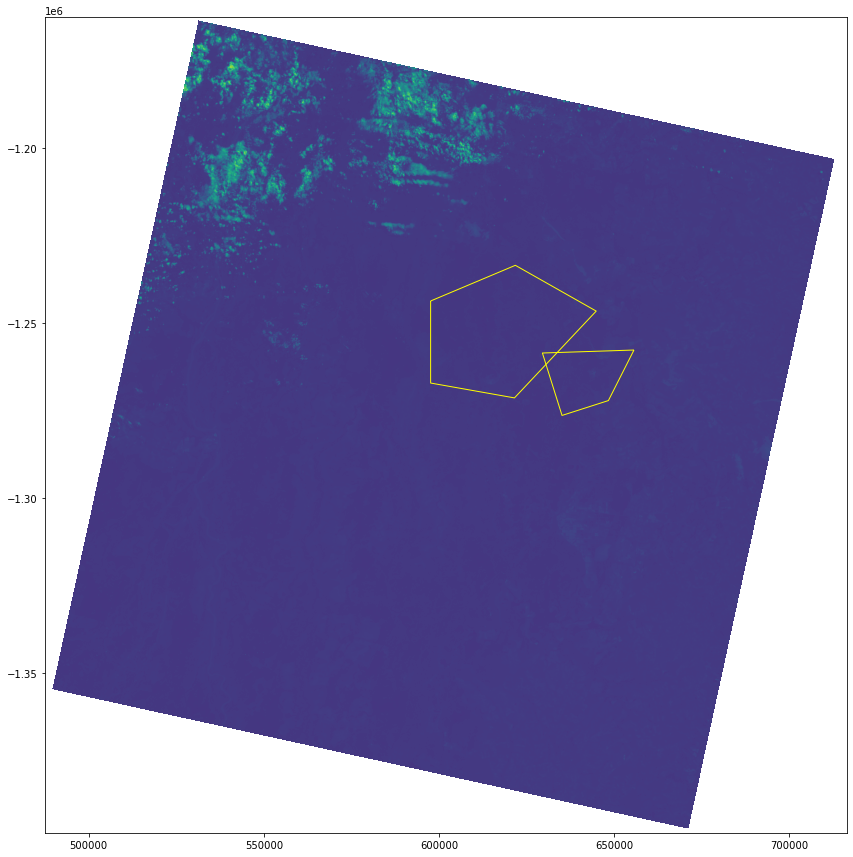

In [3]:
with rasterio.open(tiff) as raster:
    fig, ax = plt.subplots(figsize=(15, 15))
    rasterio.plot.show(raster, ax=ax)
    mask_gdf.plot(ax=ax, facecolor='none', edgecolor='yellow')

In [4]:
with rasterio.open(tiff) as raster:
    out_array, out_transform = rasterio.mask.mask(raster, mask_gdf.geometry, crop=True)
    out_profile = raster.profile
out_profile.update({'transform': out_transform,
                    'height': out_array.shape[1],
                    'width': out_array.shape[2]})

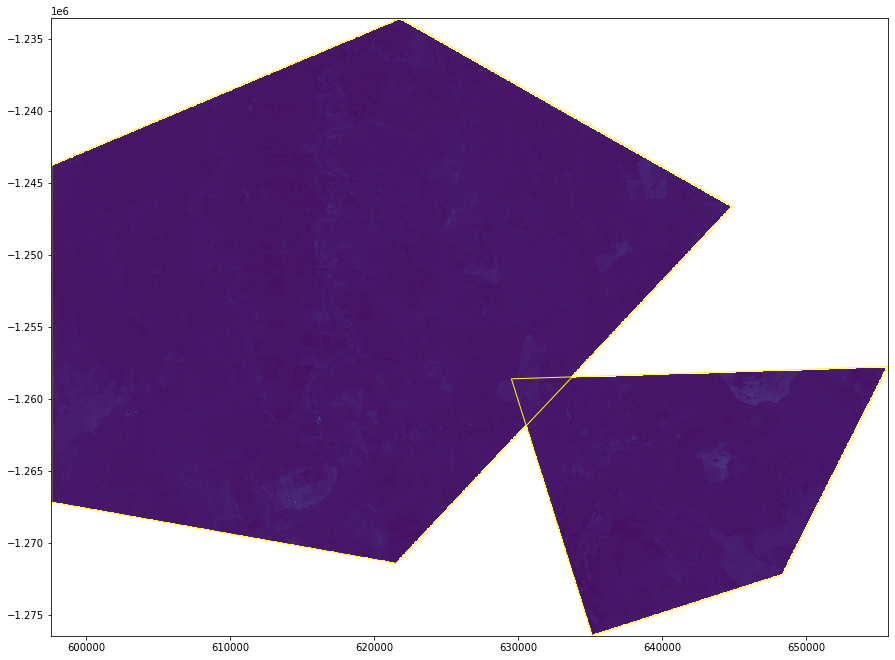

In [5]:
# without witing out to file
with rasterio.MemoryFile() as memfile:
    with memfile.open(**out_profile) as raster:
        raster.write(out_array)
    with memfile.open() as raster:
        raster_mask_profile = raster.profile
        fig, ax = plt.subplots(figsize=(15, 15))
        rasterio.plot.show(raster, ax=ax)
        mask_gdf.plot(ax=ax, facecolor='none', edgecolor='yellow')

In [6]:
# save to file
out_tiff = '../../data/aoi/out.tif'
with rasterio.open(out_tiff, 'w', **out_profile) as raster:
    raster.write(out_array)

In [ ]:
my_raster = '../../data/raster/TADXMM_01_2020_01.asc'
with rasterio.open